In [12]:
from urllib.request import urlretrieve
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

URL = 'https://raw.githubusercontent.com/knpraveen/VideoGameSales/master/vgsales.csv'

urlretrieve(URL, 'vgsales.csv') 

('vgsales.csv', <http.client.HTTPMessage at 0x7fa5a9ade9b0>)

In [13]:
# !head vgsales.csv #prints out the csv file

In [14]:
DATA = pd.read_csv('vgsales.csv')
DATA.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Display the Number of Video Games Sold from Year (1980 - 2017)

<Container object of 39 artists>

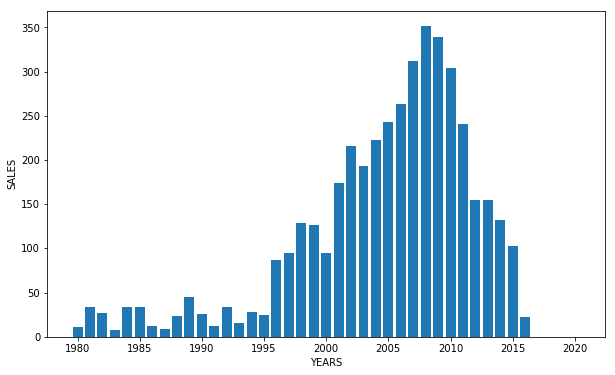

In [15]:
#
YEAR_SALES = DATA[["Year", "NA_Sales"]]
YEAR_SALES.head()

#
total_sales_per_year = YEAR_SALES.groupby(['Year'], sort = False).sum()
#
fig, tys = plt.subplots(figsize=(10,6))
x_axis = total_sales_per_year.index.values
y_axis = total_sales_per_year.NA_Sales
plt.xlabel('YEARS')
plt.ylabel('SALES')
tys.bar(x_axis, y_axis)



# Section 1: Data Cleaning 


In [16]:
df= pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
dropCol = ['Rank', 'Year', 'EU_Sales', 'JP_Sales',
          'Other_Sales', 'Global_Sales']

df.drop(columns=dropCol, inplace=True, axis=1)
df.head(10)
print(df.head())

                       Name Platform         Genre Publisher  NA_Sales
0                Wii Sports      Wii        Sports  Nintendo     41.49
1         Super Mario Bros.      NES      Platform  Nintendo     29.08
2            Mario Kart Wii      Wii        Racing  Nintendo     15.85
3         Wii Sports Resort      Wii        Sports  Nintendo     15.75
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27


In [18]:
# DataFrame has be updated to remove any video game that has made zero sales in NA

df = df.loc[df['NA_Sales'] != 0]     
df


,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27
5,Tetris,GB,Puzzle,Nintendo,23.20
6,New Super Mario Bros.,DS,Platform,Nintendo,11.38
7,Wii Play,Wii,Misc,Nintendo,14.03
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59
9,Duck Hunt,NES,Shooter,Nintendo,26.93


<Container object of 25 artists>

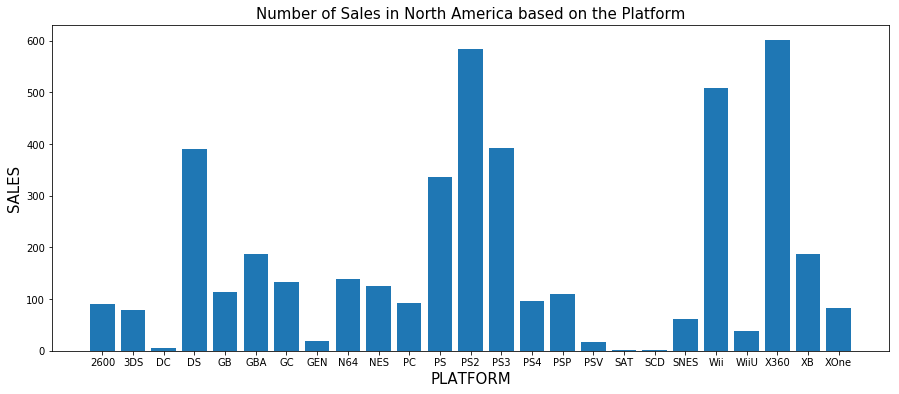

In [28]:
PLATFORM_SALES = df[["Platform", "NA_Sales"]]
PLATFORM_SALES.head()

#
total_sales_per_platform= PLATFORM_SALES.groupby(['Platform'], sort = False).sum()
#
fig, tys = plt.subplots(figsize=(15,6))
x_axis = total_sales_per_platform.index.values
y_axis = total_sales_per_platform.NA_Sales
plt.title('Number of Sales in North America based on the Platform', size=15)
plt.xlabel('PLATFORM', size=15)
plt.ylabel('SALES', size=15)
tys.bar(x_axis, y_axis)

# Data Cleaning 
- Remove outliers and un marked data from the data set 

In [ ]:
# clean_Data = pd.read_csv('vgsales.csv')
# #dropping columns 
# .drop(['Rank', 'Year', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)

In [ ]:
# # total_sales_per_year = YEAR_SALES.groupby(['Year'], sort = False).sum()
# platForm_NAsales = cleaned.groupby('Platform', sort = False).sum()
# print(platForm_NAsales)

# #
# fig, tys = plt.subplots(figsize=(17,6))
# # x_axis = total_sales_per_year.index.values
# x_axis = platForm_NAsales.index.values

# y_axis = platForm_NAsales.NA_Sales

# # # y_axis = total_sales_per_year.NA_Sales
# # plt.xlabel('YEARS')
# # plt.ylabel('SALES')
# plt.xlabel('PLATFORM')
# plt.ylabel('NA_SALES')
# # plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right'
# tys.bar(x_axis, y_axis)

In [ ]:
# clean_Data['z_score'] = stats.zscore(clean_Data['NA_Sales'])
# clean_Data

In [ ]:
# clean_Data.loc[clean_Data['z_score'].abs()<=40]